# ANOVA Lab

## Evaluation of a New Educational Product 

__Evaluation of a New Educational Product__ Your company markets educational materials aimed at parents of young children. You are planning a new product that is designed to improve children’s reading comprehension. Your product is based on new ideas from educational research, and you would like to __claim that children will acquire better reading comprehension skills utilizing these new ideas than with the traditional approach.__ Your marketing material will include the results of a study conducted to __compare two versions of the new approach with the traditional method. The standard method is called Basal, and the two variations of the new method are called DRTA and Strat__

![](https://images.pexels.com/photos/261895/pexels-photo-261895.jpeg?cs=srgb&dl=adorable-blur-bookcase-261895.jpg&fm=jpg)

__Education researchers randomly divided 66 children into three groups of 22. Each group was taught by one of the three methods. The response variable is a measure of reading comprehension called COMP that was obtained by a test taken after the instruction was completed.__


[Purdue Lab 08](http://www.stat.purdue.edu/~lfindsen/stat350/Lab8SAS.pdf)

In [1]:
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib import style

# Statistical Packages
import scipy.stats as stats
import statsmodels.api as sm #QQ plot

import mystats #my custom functions for stats

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
edu = pd.read_table("./data/eduproduct.txt")
edu.head()

,Subject,Group,Comp
0,1,B,41
1,2,B,41
2,3,B,43
3,4,B,46
4,5,B,46


### Descriptive Statistics

> Make side-by-side boxplots and an effects plot of the data. Also, make a table
giving the sample size, mean, and standard deviation for each treatment group.
From this information, do you think that all of the means are the same? Be sure to
comment on each of the plots.

In [3]:
edu.groupby("Group")['Comp'].describe()

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
B,22.0,41.045455,5.635578,32.0,36.75,41.0,45.00,54.0
D,22.0,46.727273,7.388420,30.0,42.25,48.5,52.25,57.0
S,22.0,44.272727,5.766750,33.0,42.00,45.0,48.75,53.0


In [4]:
# subgroups
b = edu[edu.Group == "B"]["Comp"]
d = edu[edu.Group == "D"]["Comp"]
s = edu[edu.Group == "S"]["Comp"]

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


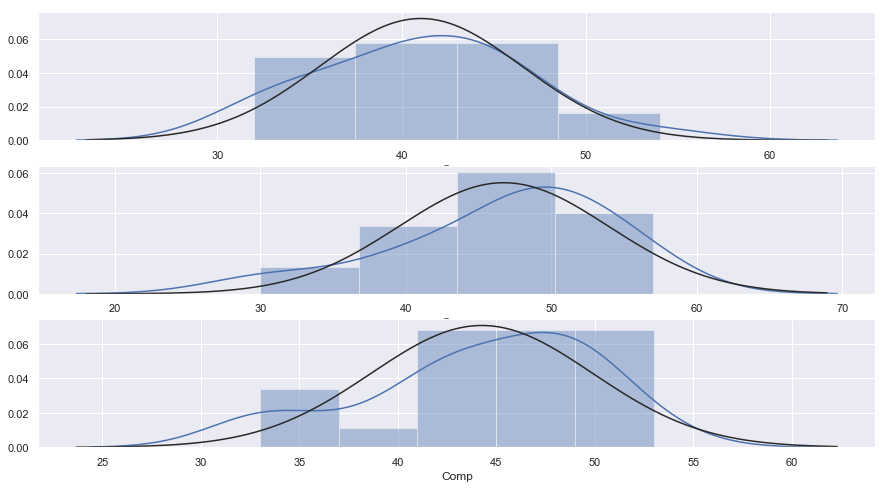

In [5]:
f, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15,8))
sns.distplot(b, kde=True, fit=stats.norm, ax = ax1);
sns.distplot(d, kde=True, fit=stats.norm, ax = ax2);
sns.distplot(s, kde=True, fit=stats.norm, ax = ax3);

The means and variance appear to be reasonabily equal in nature. Group D has the biggest variation and mean.

In [6]:
def plot_hist(data, mean=0, std=1, num_bins = 50):

    fig, ax = plt.subplots(figsize=(15,8))

    # the histogram of the data
    n, bins, patches = ax.hist(data, num_bins, density=1)

    # add a 'best fit' line
    y = ((1 / (np.sqrt(2 * np.pi) * std)) *
         np.exp(-0.5 * (1 / std * (bins - mean))**2))
    ax.plot(bins, y, '--')
    #ax.set_xlabel('Smarts')
    #ax.set_ylabel('Probability density')
    #ax.set_title(r'Histogram of pig Weights: $\mu={}$, $\sigma={}$'.format(mu, sigma))

    # Tweak spacing to prevent clipping of ylabel
    fig.tight_layout()
    plt.show()
    
def descriptive_statistics_plots(data):    
    plot_hist(data, mean = np.mean(data), std = np.std(data), num_bins= 10)
    #import scipy.stats as stats
    #sns.distplot(data, kde=False, fit=stats.norm)
    #plt.show()

    fig = plt.figure(figsize=(15,8))
    plt.subplot(2, 2, 1)
    plt.title('Boxplot of Weight Dist')
    plt.boxplot(data)

    plt.subplot(2, 2, 2)
    plt.title('QQ plot')
    import scipy.stats as stats
    stats.probplot(data, plot=plt)
    plt.show()

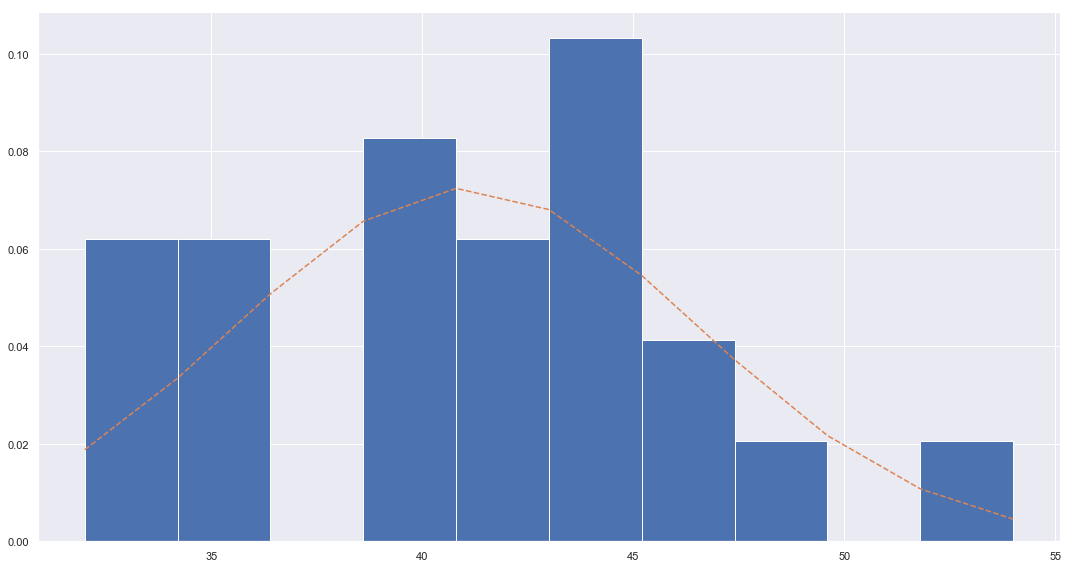

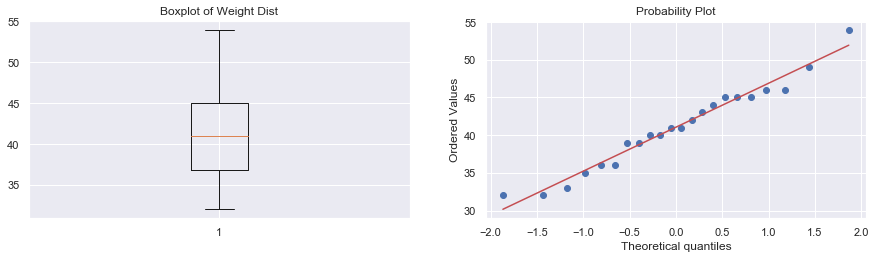

In [7]:
# plot for group b
descriptive_statistics_plots(b)

__Hist:__ The distribution appears to be right skewed, however, appears to be minor.

__Boxplot:__ appears to be roughly symmetrical with no outliers

__QQ Plot:__ the observations appear to follow the linear line indicating a normal distribution.

Even through hist appears to be right skew, box and QQ appear more normal, also considering the sample size to be 22, this distribution is normal enough to perform ANOVA test. __Assumptions Met__

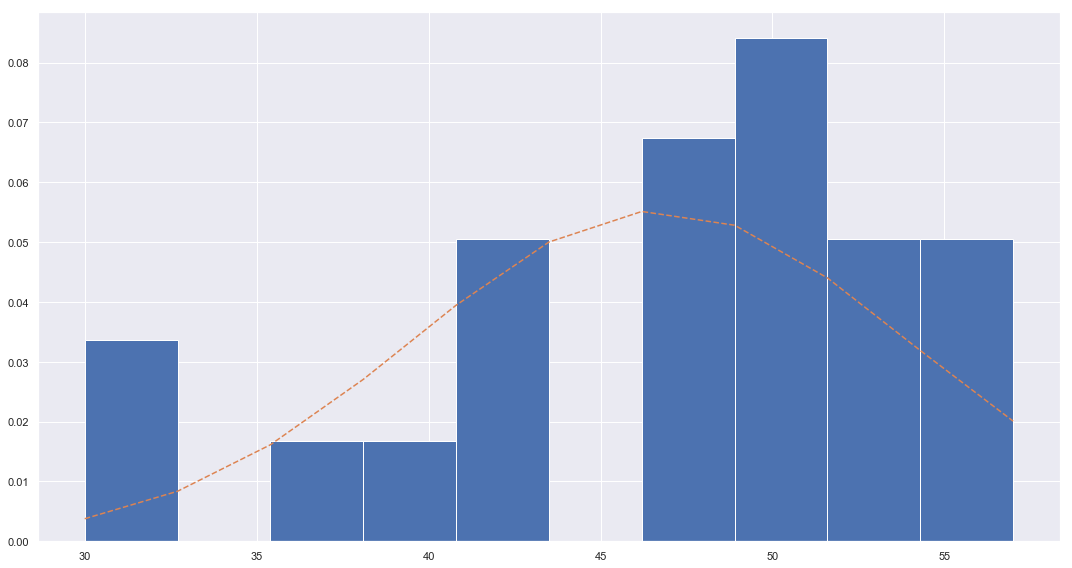

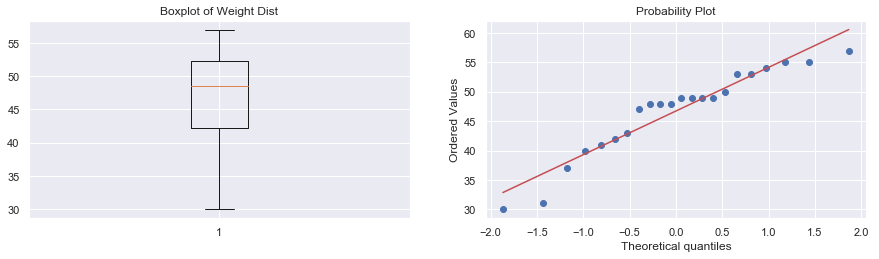

In [8]:
# plot for group d
descriptive_statistics_plots(d)

__Hist:__ The distribution appears to be left skewed. (Minor)
__Boxplot:__ Left skew
__QQ Plot:__ WW plot looks roughly normal

simialr to above in regards to the skew, with a 22 size sample, this appears to be normal enough to perform ANOVA. __Assumption Met__

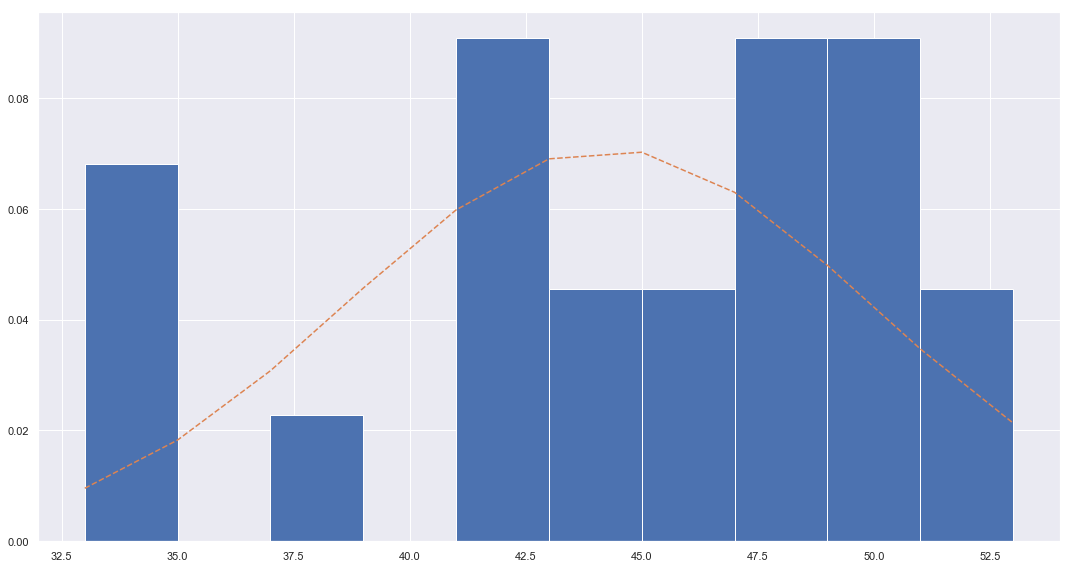

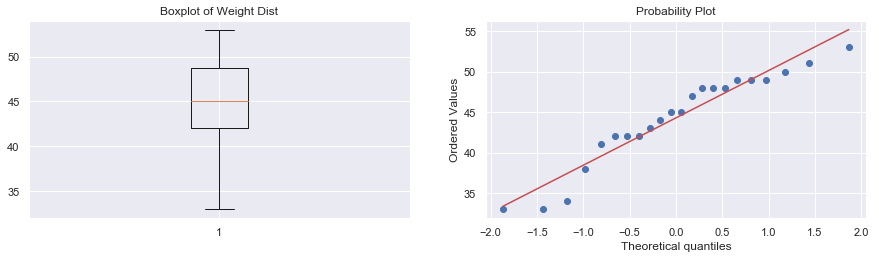

In [9]:
# plot for group s
descriptive_statistics_plots(s)

__Hist:__ The distribution appears to be slightly left skewed.However, mostly normal
__Boxplot:__ left skew (minor), no outliers
__QQ Plot:__ QQ plot looks roughly normal. 

__Assumption met for ANOVA.__

### ANOVA Assumptions

> Examine the assumptions necessary for ANOVA. Is it appropriate to continue the
analysis? Be sure to state each of the assumptions and comment on each of them
using the appropriate plots/data. Remember, you need to generate the normal
probability plots and histograms for each population.

- independence - The kids wehre randomly divided in 3 groups and each group recieved a different method. Assumping that the kids could be participate in more than one group, this assuption appears to be met.


- Normality - as discussed above, each group appears to be normal


- Equal variance - as discussed above, each group appears to have equal variance. 

### ANOVA Test

> Report the results of the ANOVA significance test (4 steps) using a significance
level of 0.05. Are your results in this step consistent with part a?


![](https://camo.githubusercontent.com/3fc31b7ceae19e434f4c3e977b85e244c690bc76/68747470733a2f2f692e737461636b2e696d6775722e636f6d2f6d4d6a546a2e706e67)


#### State The Hypothesis
$H_o: \mu_{b} = \mu_{d}= \mu_{s} = 0$

$H_a:$ At least one $\mu_{i}$ is different
    
Where $ \mu_i$ is the mean of the ith group (i = b, d, s)


#### ANOVA Test

In [10]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

fit = ols('Comp ~ Group', data = edu).fit()
print(fit.summary())

anova_results = sm.stats.anova_lm(fit, typ=2) # Type 2 ANOVA DataFrame
print(anova_results)

                            OLS Regression Results                            
Dep. Variable:                   Comp   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     4.481
Date:                Thu, 20 Dec 2018   Prob (F-statistic):             0.0152
Time:                        06:30:13   Log-Likelihood:                -213.74
No. Observations:                  66   AIC:                             433.5
Df Residuals:                      63   BIC:                             440.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.0455      1.346     30.490      0.0

* F = 4.48
* DF1 = 2
* DF2 = 63
* P-value = 0.015
* Decision: Reject Ho

_The data provides sufficiently strong evidence (P-value = 0.0152) to the claim that the population mean values of at least one of the education methods is different from the rest._

Per the results, we reject $H_o: \mu_{b} = \mu_{d}= \mu_{s} = 0$ indicating there is a difference in at least one of the treatment groups where the `p-value = 0.015` which is less than the significance level of 0.05. 

This result is consitant with our initial asusmption when evaluating the means and variance earlier in this notebook. 

>Use an appropriate multiple-comparison method to determine if the different types
of educational methods affects reading comprehension. Explain why you chose this
method. Present a graphical representation of the results if appropriate for your
method. Write a short statement for your conclusion.


_The Tukey method was chosen because we want to compare all of the means in a pairwise fashion._

Since our data is normal in nature and has equal sample sizes we will conduct the __Tukey Honestly Significant Difference (HSD) post hoc test__ to compare which group is most significant among the others.

Figure(720x432)


group1,group2,meandiff,lower,upper,reject
B,D,5.6818,1.1122,10.2515,True
B,S,3.2273,-1.3424,7.7969,False
D,S,-2.4545,-7.0242,2.1151,False


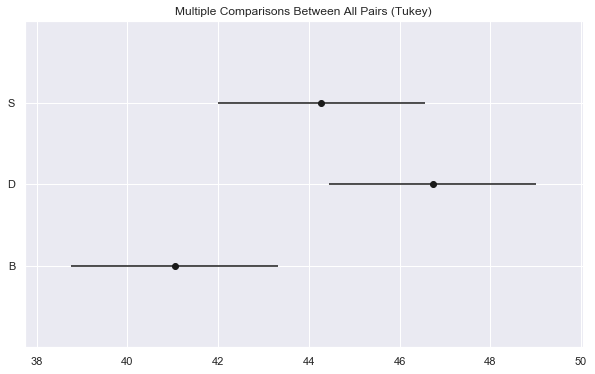

In [11]:
import statsmodels.stats.multicomp as multi
mc1 = multi.MultiComparison(edu.Comp, edu.Group)
res1 = mc1.tukeyhsd()
print(res1.plot_simultaneous())
res1.summary()

Abvoe is the __Tukey HSD multiple comparisions test__. From the original question, we want to determine if the new methods D and S are better
than the traditional method, B. We determined that our assumptions are correct therefore, we can look at the results of the study. These results show that method S is the same as method B (traditional method). However, it can be seen that method D is better than the original method

----
# ANOVA Examlpe 2

Example 9.1. Mortar mixes are usually classiﬁed on the basis of compressive strength and
their bonding properties and ﬂexibility. In a building project, engineers wanted to compare
speciﬁcally the population mean strengths of four types of mortars:
1. ordinary cement mortar (OCM)
2. polymer impregnated mortar (PIM)
3. resin mortar (RM)
4. polymer cement mortar (PCM).
Random samples of specimens of each mortar type were taken; each specimen was subjected
to a compression test to measure strength (MPa). Here are the strength measurements taken
on diﬀerent mortar specimens (36 in all).

Notes from [Joshua M. Tebbs](http://people.stat.sc.edu/Tebbs/stat509/s18notes.pdf)

In [122]:
OCM=   [51.45, 42.96, 41.11, 48.06, 38.27, 38.88, 42.74, 49.62]
OCM_ = pd.DataFrame(list(zip(OCM,list(['OCM'] * len(OCM)))))
PIM =  [64.97, 64.21, 57.39, 52.79, 64.87, 53.27, 51.24, 55.87, 61.76, 67.15]
PIM_ = pd.DataFrame(list(zip(PIM,list(['PIM'] * len(PIM)))))
RM =   [48.95, 62.41, 52.11 ,60.45, 58.07, 52.16, 61.71, 61.06, 57.63, 56.80]
RM_ = pd.DataFrame(list(zip(RM,list(['RM'] * len(RM)))))
PCM =  [35.28 ,38.59, 48.64, 50.99, 51.52, 52.85, 46.75, 48.3]
PCM_ = pd.DataFrame(list(zip(PCM,list(['PCM'] * len(PCM)))))

# Create Data Frame
d = pd.DataFrame(PIM_)
d = d.append(pd.DataFrame(RM_))
d = d.append(pd.DataFrame(OCM_))
d = d.append(pd.DataFrame(PCM_))
d.columns = ['result', 'group']
d.head()

,result,group
0,64.97,PIM
1,64.21,PIM
2,57.39,PIM
3,52.79,PIM
4,64.87,PIM


### Assumption

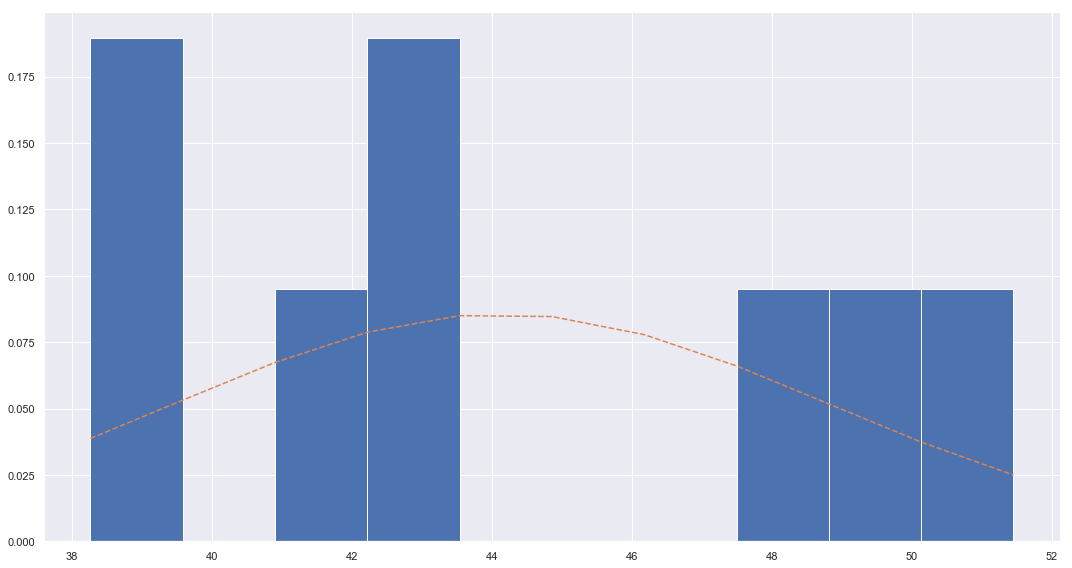

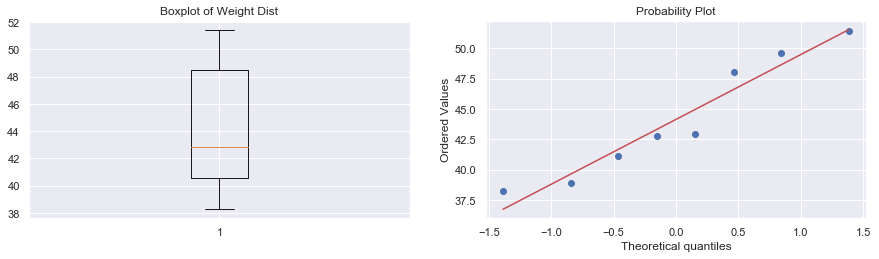

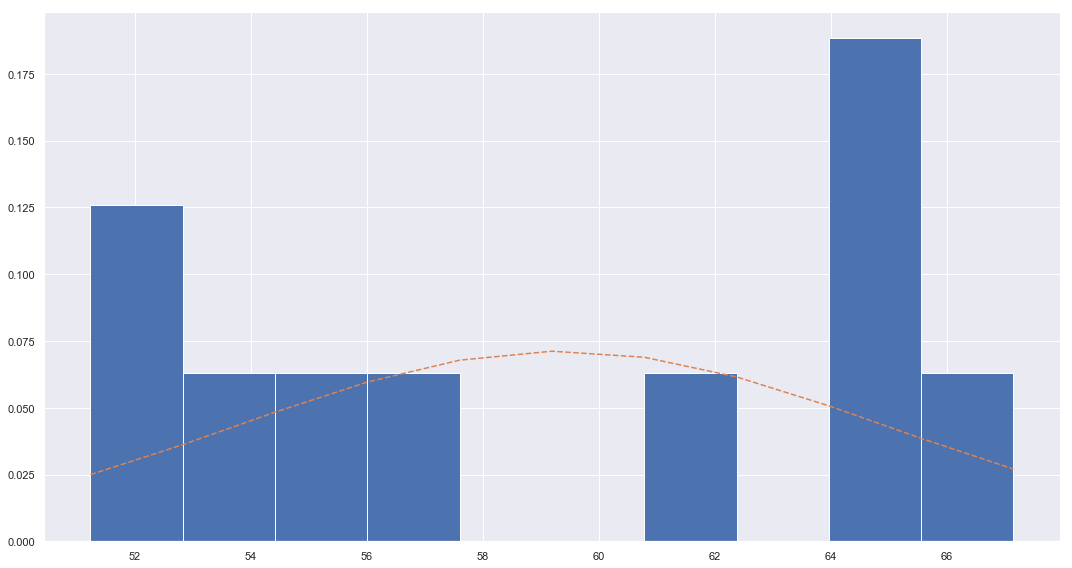

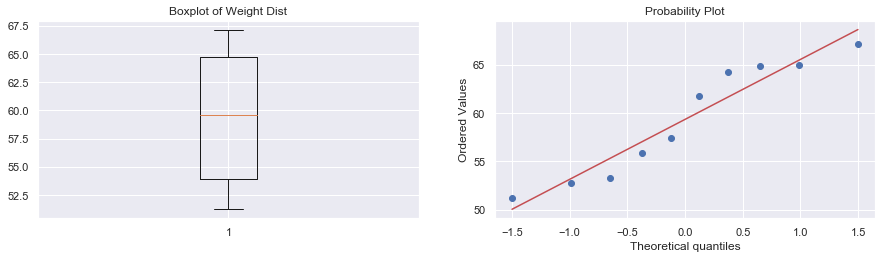

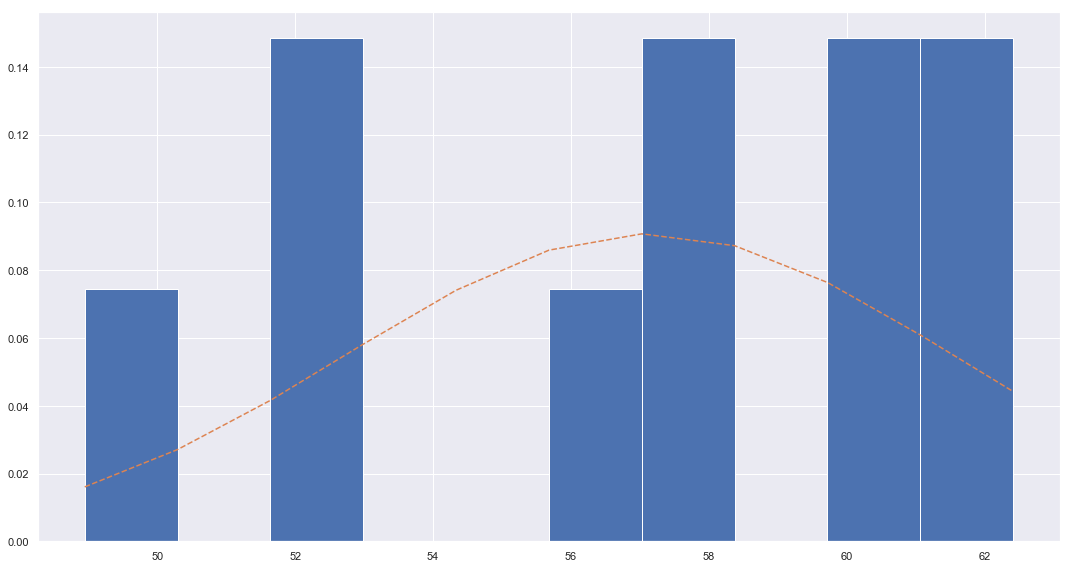

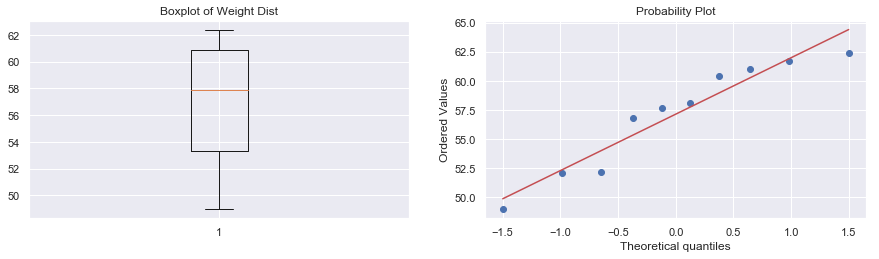

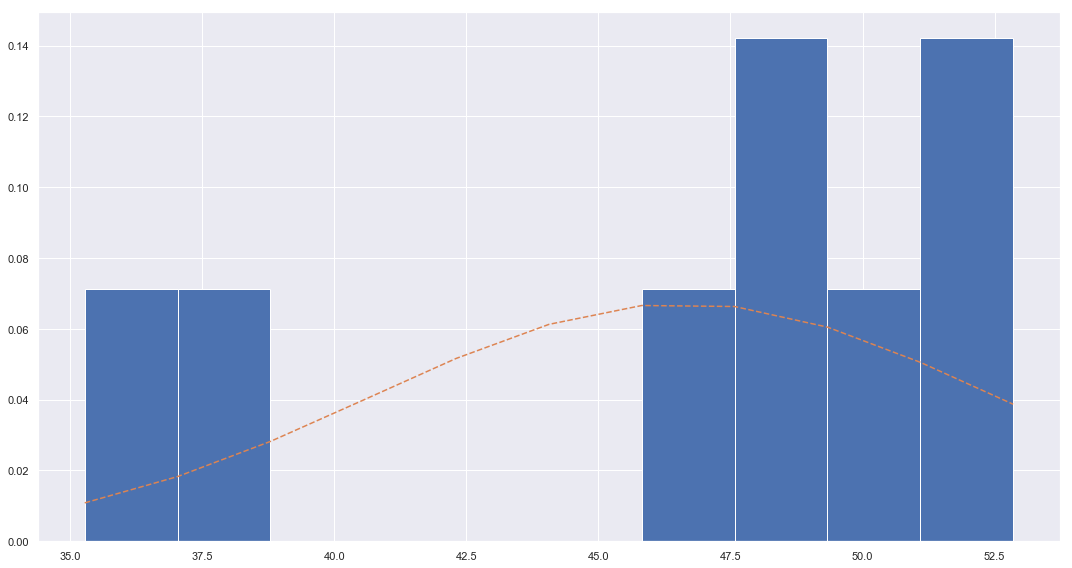

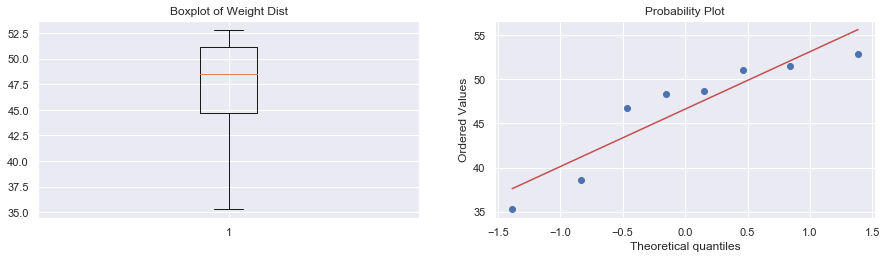

In [14]:
mystats.descriptive_statistics_plots(OCM)
mystats.descriptive_statistics_plots(PIM)
mystats.descriptive_statistics_plots(RM)
mystats.descriptive_statistics_plots(PCM)

#### Hypothesis Statement

H0 : µ1 = µ2 = ··· = µt versus _(“no treatment diﬀerence,” that is, all t population means are the same)_

H1 : the population means µi are not all equal. _( a diﬀerence among the t population means exists “somewhere.”)_


#### ANOVA Test


In [123]:
fit = ols('result ~ group', data = d).fit()
print(fit.summary())

anova_results = sm.stats.anova_lm(fit, typ=2) # Type 2 ANOVA DataFrame
print(anova_results)

                            OLS Regression Results                            
Dep. Variable:                 result   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     16.85
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           9.57e-07
Time:                        07:18:52   Log-Likelihood:                -110.24
No. Observations:                  36   AIC:                             228.5
Df Residuals:                      32   BIC:                             234.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       44.1363      1.939     22.758   

__Conclusion:__ There is very strong evidence that at least one of the four mortar strength
population means is diﬀerent. This value of F is not consistent with H0. It is much more consistent with H1.

### Post Hoc Test
BNow that we've reject Ho, we will perform __Post Hoc Testing__ to determine which popula
tion mean(s) is(are) diﬀerent and how they are diﬀerent.  To do this, we will construct Tukey pairwise conﬁdence intervals for all population treatment mean differences. 

Therfore, we have t = 4 populations and therefore 6 pairwise intervals:

`  µ1 −µ2, µ1 −µ3, µ1 −µ4, µ2 −µ3, µ2 −µ4, µ3 −µ4,`

where:

    µ1 = population mean strength for mortar type OCM

    µ2 = population mean strength for mortar type PIM

    µ3 = population mean strength for mortar type RM

    µ4 = population mean strength for mortar type PCM.

#### Multiple Comparison Problem
![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT18WpywvvWawfizB_HvoGfDIf0VTryM3LSnyGiBqWCAPCuWDhWgQ)

Before we run the test we should understand the effect of inequality in the probability we will construct. If we construct multiple confidence intervals (in this case 6 of them), and if we construch each one using 95% significance level, then the overall confidence level in the 6 intervals will be less than 95% because we ran the test for multiplce comparisions. 


In [129]:
# bonfroni multiple comparision problem
6 * (0.95) - 5

0.6999999999999993

Therefore with only 4 treatemetns in our population the probability that each of the percent intevals will contain its population mean difference can be as low as 70%. _(can we do better?!)_

### Tukey Family Wise Confidence Level 
Of Couse, we can construct a confidence intervals for all pairwise intervals and still have our 95% confidence intervals. To increate the confidence level associted with each interval, we cna use the __Tukey method__ that guarantees the __family0wise confidence level__ at our noted 95% levle. 

Figure(720x432)


group1,group2,meandiff,lower,upper,reject
OCM,PCM,2.4787,-4.9519,9.9094,False
OCM,PIM,15.2157,8.1665,22.265,True
OCM,RM,12.9987,5.9495,20.048,True
PCM,PIM,12.737,5.6877,19.7863,True
PCM,RM,10.52,3.4707,17.5693,True
PIM,RM,-2.217,-8.8631,4.4291,False


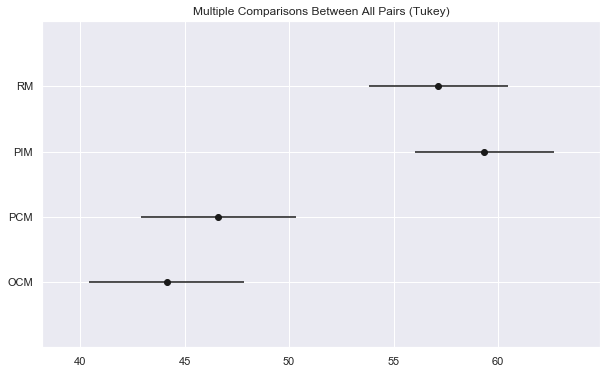

In [124]:
import statsmodels.stats.multicomp as multi
mc1 = multi.MultiComparison(d.result, d.group)
res1 = mc1.tukeyhsd()
print(res1.plot_simultaneous())
res1.summary()

Mortar data: The following pairs of population means are declared to be diﬀerent:

            PIM-OCM RM-OCM PIM-PCM RM-PCM.
    
The following pairs of population means are declared to be not diﬀerent:

            PCM-OCM RM-PIM

PCM-OCM: We are (at least) 95 percent conﬁdent that the diﬀerence in the population mean strengths for the PCM and OCM mortars is between −4.95 and 9.91 MPa.
- This conﬁdence interval includes “0,” so we cannot conclude these two population means are diﬀerent.
- An equivalent ﬁnding is that the adjusted p-value for these two mortar types, given in the p adj column, is large (0.803).

PIM-OCM: We are (at least) 95 percent conﬁdent that the diﬀerence in the population mean strengths for the PIM and OCM mortars is between 8.17 and 22.27 MPa.
- This conﬁdence interval does not include “0” and contains only positive values. This suggests that the population mean strength of the PIM mortar is greater than the population mean strength of the OCM mortar.
- An equivalent ﬁnding is that the adjusted p-value for these two mortar types, given in the p adj column, is very small (<0.001).

We can therefore conclude:
- The PIM and RM population mean strengths are larger than the OCM and PCM population mean strengths.
- The PIM and RM population mean strengths are not diﬀerent. • The OCM and PCM population mean strengths are not diﬀerent.

Furthermore, we have an overall (family-wise) conﬁdence level of 95 percent that all of our
conclusions are correct. Had we not used an adjusted analysis based on Tukey’s method (e.g.,
just calculate all unadjusted pairwise intervals), our overall conﬁdence level would have been
much lower (as low as 70 percent).

Source: Notes from [Joshua M. Tebbs](http://people.stat.sc.edu/Tebbs/stat509/s18notes.pdf)